**Question 1** 
(a)

In [41]:
import numpy as np
from numpy import linalg
from numpy.linalg import inv,norm

In [42]:
def general(A, b, x_0, M, max_iter, epsilon, w = 1):
  convergance_val_lst = []
  convergance_factor_lst = []
  x = x_0
  for k in range(max_iter):
    try:
      x_pre = x
      x = x_pre + w * inv(M) @ (b - A @ x_pre)

      convergance_val_lst.append(norm((A @ x)-b))
      convergance_factor_lst.append(norm(A @ x - b) / norm(A @ x_pre - b) )

      if(norm((A @ x) - b) / norm(b) < epsilon or norm(x - x_pre) / norm(x) < epsilon):
        print("Converged with factor",convergance_factor_lst[-1])
        break

    except Exception as e:
      print(e)

    if(k == max_iter-1):
      print("Max iteration reached!")

  return x , convergance_val_lst , convergance_factor_lst

In [43]:
def LDU_decomposition(A):
    U=np.triu(A,1)
    L=np.tril(A,-1)
    D=A-U-L
    return L,D,U

In [44]:
def jacobi(A,b,x_0,max_iter,epsilon,w=0.1):
  print("[jacobi]")
  L,D,U=LDU_decomposition(A)
  
  return general(A, b, x_0, D, max_iter, epsilon,w)  

In [45]:
def gauss_sidel(A,b,x_0,max_iter,epsilon,w=1):
  print("[gauss_sidel]")
  L,D,U = LDU_decomposition(A)
  
  return general(A, b, x_0, (D+L), max_iter, epsilon,w)

In [46]:
def steepest_descent(A,b,x_0,max_iter, epsilon,w=1):
  print("[steepest_descent]")
  x_pre = x_0
  r_pre = b - A @ x_0
  convergance_val_lst = []
  convergance_factor_lst = []
  
  for k in range(max_iter):
    if (np.inner(r_pre,A @ r_pre) == 0):
      raise Exception ("div by 0")
    
    alpha = np.inner(r_pre, r_pre) / np.inner(r_pre,A @ r_pre)
    x_k = x_pre + alpha * r_pre
    r_k = b - A @ x_k
    
    convergance_val_lst.append(norm((A @ x_k)-b))
    convergance_factor_lst.append(norm(A @ x_k - b) / norm(A @ x_pre - b) )

    if( norm((A @ x_k)-b) / norm(b)< epsilon or norm(x_k - x_pre) / norm(x_k) < epsilon):
      conv = min(norm((A @ x_k) - b) / norm(b) , norm(x_k - x_pre) / norm(x_k) )
      print("Converged with ",conv)
      break

    x_pre = x_k
    r_pre = r_k
   
  return (x_k , convergance_val_lst , convergance_factor_lst)
  

In [47]:
def conjugate_gradient(A,b,x_0,max_iter,epsilon,w=1):
  print("[conjugate_gradient]")
  x_pre=x_0
  r_pre=(b-(A@x_0))
  p_pre= (b-(A@x_0)) 
  convergance_val_lst = []
  convergance_factor_lst = []
  for k in range(max_iter):
    if (np.inner(p_pre,A @ p_pre) == 0):
      raise Exception ("div by 0")
      
    alpha=np.inner(r_pre, p_pre)/np.inner(p_pre,A @ p_pre)
    x_k = x_pre + alpha * p_pre
    r_k = b-(A @ x_k)
    convergance_val_lst.append(norm((A @ x_k)-b))
    convergance_factor_lst.append(norm(A @ x_k - b) / norm(A @ x_pre - b) )

    if( norm((A @ x_k)-b) / norm(b)< epsilon or norm(x_k - x_pre) / norm(x_k) < epsilon):
      conv = min(norm((A @ x_k) - b) / norm(b) , norm(x_k - x_pre) / norm(x_k))
      print("Converged with ",conv)
      break

    x_pre=x_k
    r_pre=r_k
    
    beta = np.inner(r_k,r_k)/np.inner(r_pre,r_pre)
    p_pre = r_k + beta * p_pre
  return (x_k , convergance_val_lst , convergance_factor_lst)

(b)

[jacobi]
Converged with factor 0.9704727126496447
used weight:  0.2


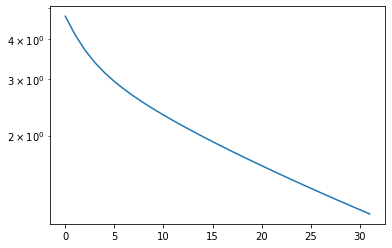

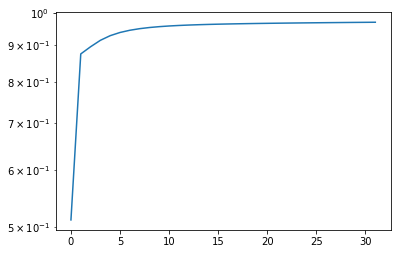

[gauss_sidel]
Converged with factor 0.8124056997833048


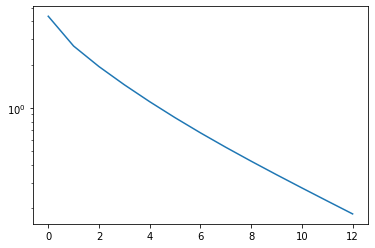

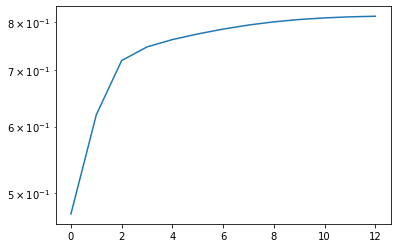

[steepest_descent]
Converged with  0.009486372686727624


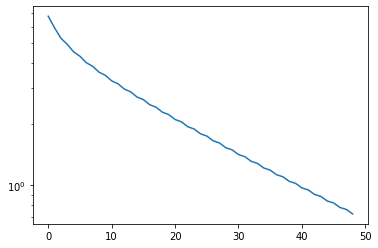

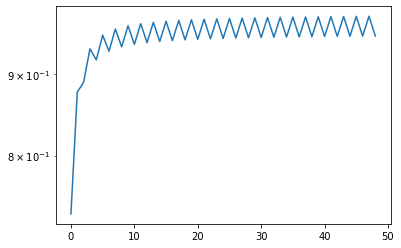

[conjugate_gradient]
Converged with  0.009171574050645346


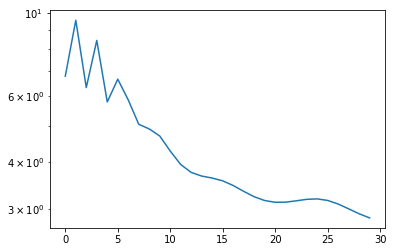

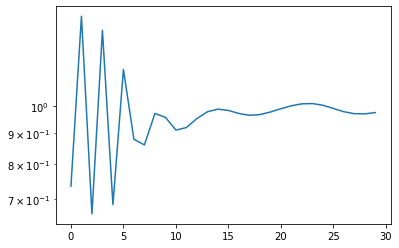

In [48]:
import numpy as np
from scipy.sparse import random
import scipy.sparse as sparse
from matplotlib import pyplot as plt

def generate_sparse_matrix(n=256):
  A = random(n, n, 5 / n, dtype=float)
  v = np.random.rand(n)
  v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')
  A = A.transpose() * v * A + 0.1*sparse.eye(n)
  return np.array(A.toarray())
  
def run_iterators_algos(n,max_iter):
  A = generate_sparse_matrix(n)
  x = np.zeros(n)
  b = np.random.rand(n)
  w = 0.1
  epsilon=0.01
  algorithms = [jacobi,gauss_sidel,steepest_descent,conjugate_gradient]


  for algorithm in algorithms:
    if(algorithm == jacobi):
      w=0.2
      x_hat,convergance_val_lst,convergance_factor_lst = algorithm(A,b,x,max_iter,epsilon,w)
      print("used weight: ",w )

    else:
      x_hat,convergance_val_lst,convergance_factor_lst = algorithm(A,b,x,max_iter,epsilon)

    plt.semilogy(convergance_val_lst)
    plt.show()
    plt.semilogy(convergance_factor_lst)
    plt.show()


run_iterators_algos(256,100)


**Question 3**

In [49]:
def GMRES(A,b,x_0,max_iter, epsilon,w=1):
  print("[GMRES]")
  x_pre = x_0
  r_pre = b - A @ x_0
  convergance_val_lst = []
  convergance_factor_lst = []
  
  for k in range(max_iter):
    if ((r_pre.transpose() @ A.transpose() @ A @ r_pre) == 0):
      raise Exception ("div by 0")
    
    alpha = (r_pre.transpose() @ A @ r_pre) / (r_pre.transpose() @ A.transpose() @ A @ r_pre)
    x_k = x_pre + alpha * r_pre
    r_k = b - A @ x_k
    
    convergance_val_lst.append(norm((A @ x_k)-b))
    convergance_factor_lst.append(norm(A @ x_k - b) / norm(A @ x_pre - b) )

    if( norm((A @ x_k)-b) / norm(b)< epsilon or norm(x_k - x_pre) / norm(x_k) < epsilon):
      conv = min(norm((A @ x_k) - b) / norm(b) , norm(x_k - x_pre) / norm(x_k) )
      print("Converged with ",conv)
      break

    x_pre = x_k
    r_pre = r_k
   
  return (x_k , convergance_val_lst , convergance_factor_lst)

In [50]:
A = np.array([[5,4,4,-1,0],[3,12,4,-5,-5],[-4,2,6,0,3],[4,5,-7,10,2],[1,2,5,3,10]])
b = np.array([1,1,1,1,1]).transpose()
x_0 = np.array([0,0,0,0,0]).transpose()


[GMRES]


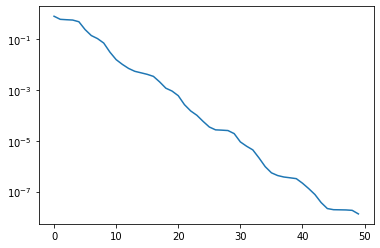

In [51]:
x_hat,convergance_val_lst,convergance_factor_lst = GMRES(A,b,x_0,50,10 ** -10)
plt.semilogy(convergance_val_lst)
plt.show()

**Question 4 (a)**

[jacobi]
Converged with factor 0.9216765211245098


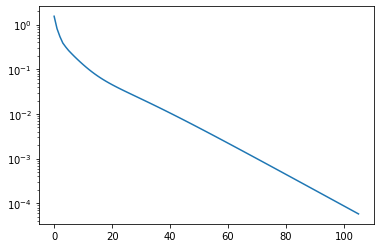

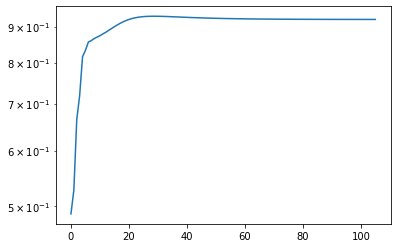

[SOLUTION]:  [ 1.33071029  0.66404363  0.99739231 -0.00255759 -0.01016757 -0.51206921
 -0.05751581 -0.4685068   0.35159132 -0.29425192]
Converged after:  106


In [52]:
L = np.array([[2,-1,-1,0,0,0,0,0,0,0],[-1,2,-1,0,0,0,0,0,0,0],[-1,-1,3,-1,0,0,0,0,0,0],[0,0,-1,5,-1,0,0,0,0,0],[0,0,0,-1,4,-1,-1,-1,0,0],
              [0,0,0,0,-1,3,-1,-1,0,0],[0,0,0,-1,-1,-1,5,-1,0,-1],[0,0,0,0,-1,-1,-1,4,0,-1],[0,0,0,-1,0,0,0,0,2,-1],[0,0,0,-1,0,0,-1,-1,-1,4]])
b = [1,-1,1,-1,1,-1,1,-1,1,-1]
x_0 = np.zeros(10)
x_hat,conv_lst,residu_lst = jacobi(L,b,x_0,200,10 ** (-5),1)
plt.semilogy(conv_lst)
plt.show()
plt.semilogy(residu_lst)
plt.show()
print("[SOLUTION]: ",x_hat)
print("Converged after: ",len(conv_lst))



(b)

[jacobi precoditioned]
Converged with factor 0.34414494459203065


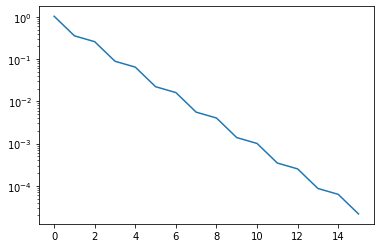

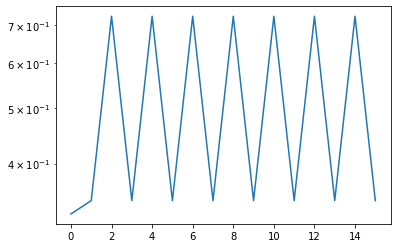

[SOLUTION]:  [ 1.33079286  0.66412619  0.99745953 -0.00252521 -0.01010097 -0.51199491
 -0.05744946 -0.4684343   0.35164145 -0.29419188]
Converged after:  16


In [53]:
M = np.zeros((10,10))
M_1 = L[:3, :3]
M_2 = L[3:,3:]
M[:3,:3] = M_1
M[3:,3:] =  M_2

def jacobi_precoditioned(A,b,x_0,max_iter,epsilon,w=1):
  print("[jacobi precoditioned]")
  
  return general(A, b, x_0, M, max_iter, epsilon,w)  

x_hat,conv_lst,residu_lst = jacobi_precoditioned(L,b,x_0,100,10**(-5),1)
plt.semilogy(conv_lst)
plt.show()
plt.semilogy(residu_lst)
plt.show()

print("[SOLUTION]: ",x_hat)
print("Converged after: ",len(conv_lst))


(d)

[jacobi precoditioned]
Converged with factor 0.9481493027780972


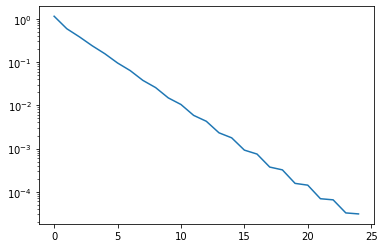

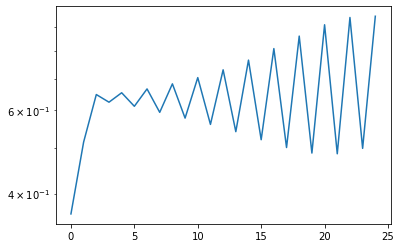

[SOLUTION]:  [ 1.33079877  0.66413211  0.99746544 -0.4684515  -0.01011555 -0.5120108
 -0.05746535 -0.00253359  0.35162722 -0.29421198]
Converged after:  25


In [60]:
M = np.zeros((10,10))
L[[3,7]] = L[[7,3]]
L[:,[3,7]] = L[:,[7,3]]
M_1 = L[:3, :3]
M_2 = L[3:7,3:7]
M_3 = L[7:,7:]

M[:3,:3] = M_1
M[3:7,3:7] =  M_2
M[7:,7:] =  M_3

x_hat,conv_lst,residu_lst = jacobi_precoditioned(L,b,x_0,100,10**(-5),0.95)
plt.semilogy(conv_lst)
plt.show()
plt.semilogy(residu_lst)
plt.show()

print("[SOLUTION]: ",x_hat)
print("Converged after: ",len(conv_lst))
